In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import chi2
import os

In [144]:
seeds = pd.read_csv('seeds.txt', sep = '\t')
seeds.head()

,area,perimeter,compact,length_k,width_k,asym,length_k_g,group
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [134]:
0.8710*(14.84**2)/4/15.26

3.142472110091743

In [135]:
pai = seeds.compact * (seeds.perimeter **2) / 4 / seeds.area

In [136]:
pai.head()

0    3.142472
1    3.142544
2    3.143246
3    3.143367
4    3.144270
dtype: float64

In [142]:
pai.mean()

3.1415822293010915

In [176]:
pi = np.pi
fac1 = 4 * pi * seeds.area
fac2 = seeds.perimeter**2
new_comp = (4 * pi * seeds.area) * (1 / seeds.perimeter**2)
offset = new_comp.round(6) - seeds.compact
pd.concat([seeds.compact, new_comp, new_comp - seeds.compact, fac1, fac2], axis = 1).head(10)
#print(type(con))
#(new_comp - seeds.compact).plot()

,compact,0,1,area,perimeter
0,0.8710,0.870756,-0.000244,191.762816,220.2256
1,0.8811,0.880833,-0.000267,186.987595,212.2849
2,0.9050,0.904524,-0.000476,179.573436,198.5281
3,0.8955,0.894995,-0.000505,173.918569,194.3236
4,0.9034,0.902631,-0.000769,202.821222,224.7001
5,0.8951,0.894913,-0.000187,180.704409,201.9241
6,0.8799,0.879215,-0.000685,184.599984,209.9601
7,0.8911,0.891864,0.000764,177.311489,198.8100
8,0.8747,0.874346,-0.000354,208.978743,239.0116
9,0.8880,0.888325,0.000325,206.591133,232.5625


In [177]:
offset.var()

1.5685689943040117e-07

<AxesSubplot:>

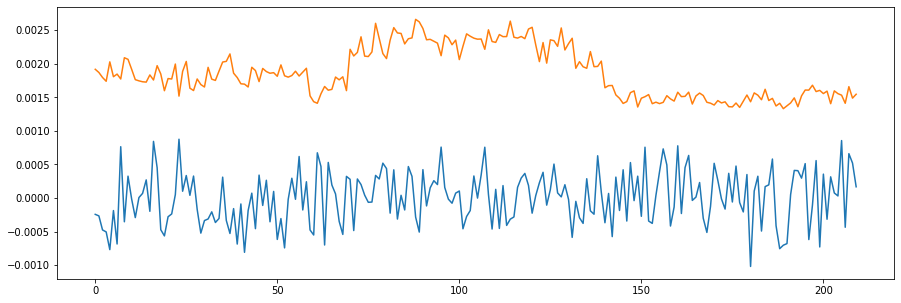

In [171]:
plt.figure(figsize = (15,5))
(new_comp - seeds.compact).plot()
(fac1/ 100000).plot()

In [3]:
mean = seeds.mean(axis = 0)
print(mean)

area          14.847524
perimeter     14.559286
compact        0.870999
length_k       5.628533
width_k        3.258605
asym           3.700201
length_k_g     5.408071
group          2.000000
dtype: float64


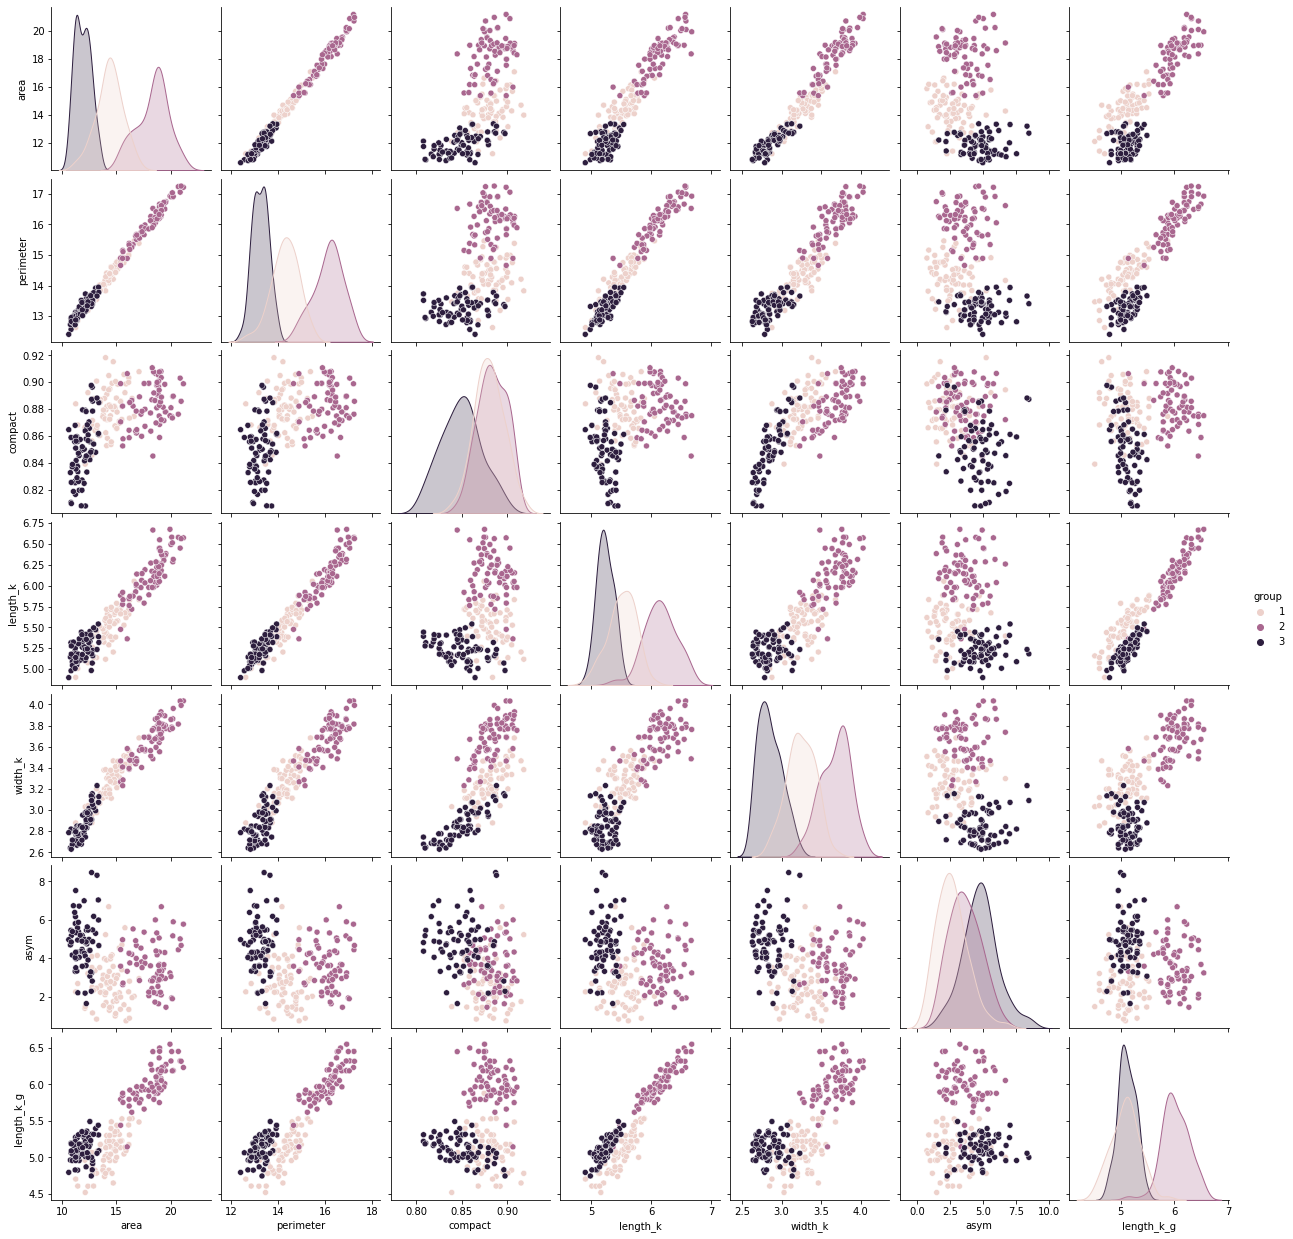

In [32]:
seaborn.pairplot(seeds, hue = 'group')

## Indenpendent hypothesis

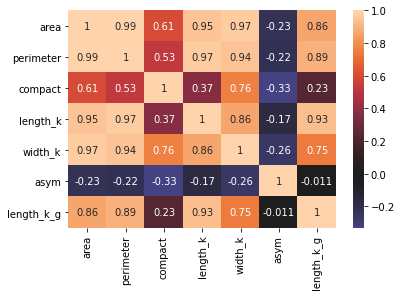

<AxesSubplot:>

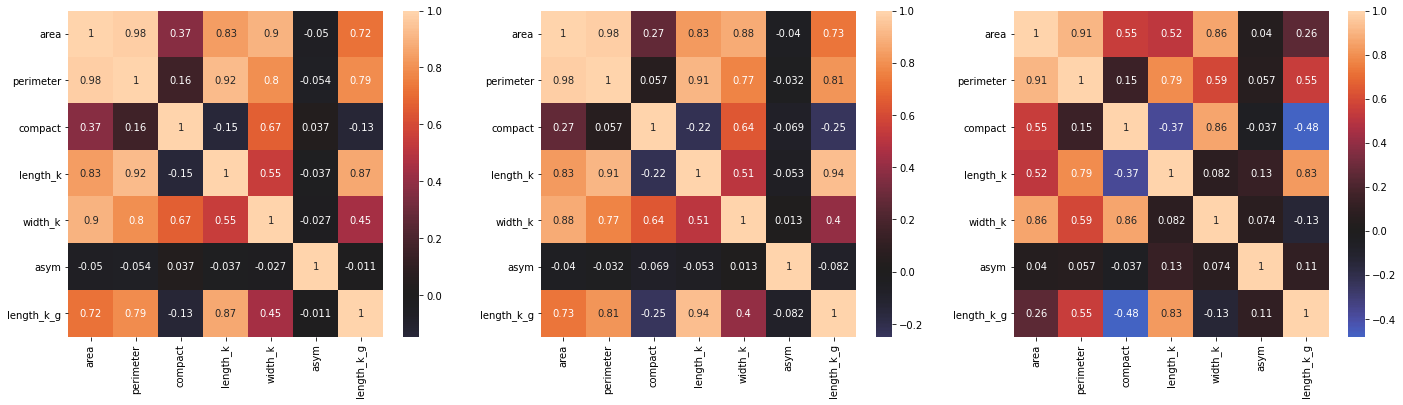

In [4]:
corr = seeds.iloc[:,:-1].corr()

seaborn.heatmap(corr, center = 0, annot = True)
plt.show()
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
seaborn.heatmap(seeds[seeds['group']==1].iloc[:,:-1].corr(), center = 0, annot = True)
plt.subplot(1,3,2)
seaborn.heatmap(seeds[seeds['group']==2].iloc[:,:-1].corr(), center = 0, annot = True)
plt.subplot(1,3,3)
seaborn.heatmap(seeds[seeds['group']==3].iloc[:,:-1].corr(), center = 0, annot = True)

<AxesSubplot:>

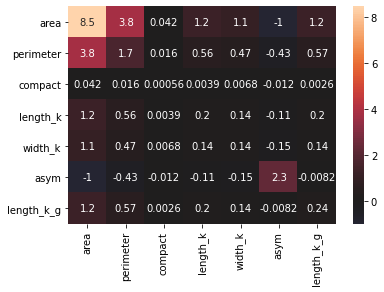

In [5]:
cov = seeds.iloc[:,:-1].cov()
seaborn.heatmap(cov, center = 0, annot = True)

In [6]:
def hypothesis_test(df):
    corr = np.array(df.corr())
    data = np.array(df)
    mean = data.mean(axis = 0)
    print('mean: {}'.format(mean))
    
    n = len(df)
    print('Total number: {}'.format(n))
    p = 2
    
    LRT = np.zeros(corr.shape)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[1]):
            #print(i, j)
            S = np.mat(corr[[i,j]][:, [i,j]])
            sgm_0 = np.mat(np.diag(np.diag(S)))
            mtp = np.linalg.inv(sgm_0) * S
            LRT[i,j] = n * (np.trace(mtp) - np.log(np.linalg.det(mtp)) - p)
            LRT[j,i] = LRT[i,j]
    seaborn.heatmap(LRT, center = chi2.isf(0.05, 3), annot = True)
            
    


mean: [14.84752381 14.55928571  0.87099857  5.62853333  3.25860476  3.70020095
  5.40807143]
Total number: 210


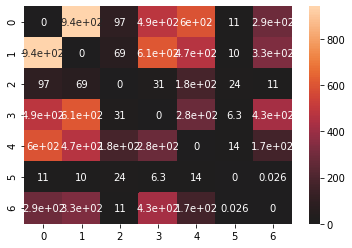

In [7]:
hypothesis_test(seeds.iloc[:,:-1])

mean: [14.33442857 14.29428571  0.88007     5.50805714  3.24462857  2.66740286
  5.08721429]
Total number: 70


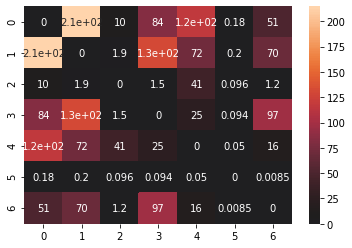

In [8]:
hypothesis_test(seeds[seeds['group']==1].iloc[:,:-1])

mean: [18.33428571 16.13571429  0.88351714  6.14802857  3.67741429  3.6448
  6.0206    ]
Total number: 70


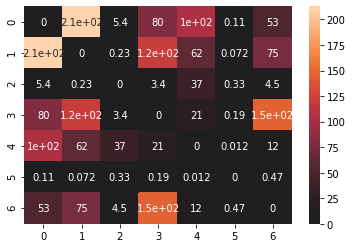

In [9]:
hypothesis_test(seeds[seeds['group']==2].iloc[:,:-1])

mean: [11.87385714 13.24785714  0.84940857  5.22951429  2.85377143  4.7884
  5.1164    ]
Total number: 70


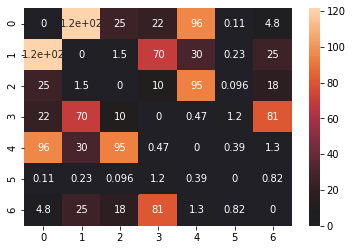

In [10]:
hypothesis_test(seeds[seeds['group']==3].iloc[:,:-1])

In [11]:
print(chi2.isf(0.05, 3))
print(chi2.isf(0.01, 3))

7.814727903251178
11.344866730144368


In [12]:
print(chi2.isf(0.05, 1))
print(chi2.isf(0.01, 1))

3.8414588206941285
6.634896601021217


## Gaussian model （预测是这一部分）

In [112]:
def estimate_one_population(estimate_data, observation_data):
    # estimate_data = [n, 1]
    # observation_data= [n, p]
    est_data = np.matrix(estimate_data).reshape(-1, 1)
    obs_data = np.matrix(observation_data)
    p = obs_data.shape[1]
    
    u1 = np.mean(est_data, axis  = 0)
    u2 = obs_data.mean(axis = 0)
    
    cov_mat = np.matrix(np.cov(np.hstack((est_data, obs_data)), rowvar = False))
    
    sig_11 = cov_mat[[0],:][:, [0]]
    sig_12 = cov_mat[[0], :][:, 1:]
    sig_21 = cov_mat[1:, :][:, [0]]
    sig_22 = cov_mat[1:,:][:, 1:]
    
    sig_11_2 = sig_11 - sig_12 * np.linalg.inv(sig_22) * sig_21
    k = sig_12 * np.linalg.inv(sig_22)
    
    b = u1 - (k * u2.T).T
    
    predict = (k * obs_data.T).T + b
    error = np.array(predict - est_data) # [n, 1]
    error = (error**2).mean()
    
    return {
        'u1': u1,
        'u2': u2,
        'k': k,
        'b': b,
        'var_new': sig_11_2,
        'error': error,
        'error_var': error / float(sig_11[0][0]),
        'sig_11': sig_11
    }

In [127]:
def get_predict(result, observation_data):
    obs_data = np.matrix(observation_data)
    predict = (result['k'] * obs_data.T).T + result['b']
    predict = np.array(predict).reshape(-1)
    return predict

In [128]:
def plot_predict(estimate_data, observation_data, label = None):
    r = estimate_one_population(estimate_data, observation_data)
    
    est_data = np.array(estimate_data).reshape(-1)
    print(r['k'].shape)
    print(r['error'])
    predict = get_predict(r, observation_data)
    
    plt.figure()
    x = np.arange(len(est_data))
    plt.scatter(x, est_data, label = label, color = 'blue')
    plt.scatter(x, predict, label = label, color = 'orange')
    plt.show()
    

In [203]:
r = estimate_one_population(seeds.iloc[:, 0], seeds.iloc[:, [4]])
r

{'u1': matrix([[14.84752381]]),
 'u2': matrix([[3.25860476]]),
 'k': matrix([[7.47827019]]),
 'b': matrix([[-9.52120304]]),
 'var_new': matrix([[0.48769935]]),
 'error': 0.4853769727649524,
 'error_var': 0.05733012788542264,
 'sig_11': matrix([[8.46635078]])}

预测 Area  (var = 8.47)

|  指标   | 4    |  5    | 7  | 4,5  |  4,7  | 5,7  |4,5,7 | 2,4,5,7  | 2,3,4,5,6,7  | 
|  ----  | ----  |
| var_new  | 0.826 | 0.488 | 2.15 | 0.0586 | 0.793 | 0.128 | 0.0527 | 0.0166 | 0.0121 |
| error   | 0.822 | 0.485 | 2.14 | 0.0584 | 0.789 | 0.128 | 0.0525 | 0.0165 | 0.0120 |

预测 Perimeter (1.706)

(1, 3)
0.05245333158332415


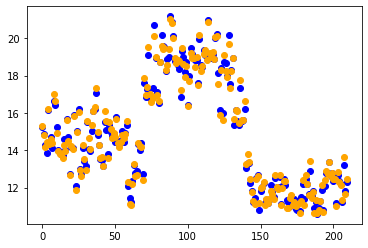

In [130]:
plot_predict(seeds.iloc[:, 0], seeds.iloc[:, [3, 4,  6]], seeds.group)

两种预测compact的方式：高斯模型拟合，先预测面积、周长，再由计算得到C

var_new: [[5.39824371e-05]]
 error: 5.372537788936088e-05
<class 'numpy.ndarray'>
error cal: 7.327767538254512e-05


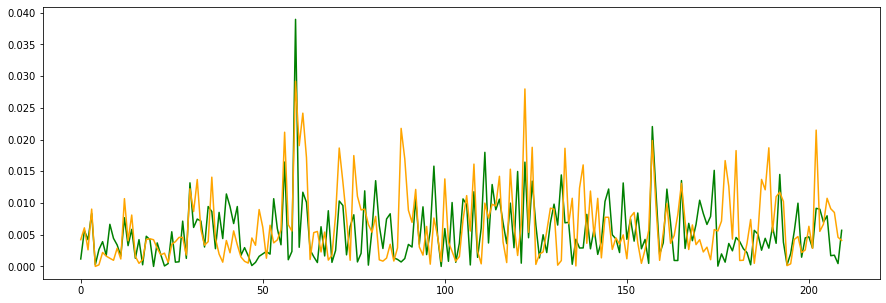

In [229]:
X2 = seeds.iloc[:, [3, 4, 6]]
# gaussian
r = estimate_one_population(seeds.iloc[:, 2], X2)
predict_g = get_predict(r, X2)
print('var_new: {}\n error: {}'.format(r['var_new'], r['error']))

# calculate

r_A = estimate_one_population(seeds.iloc[:, 0],X2)
A = get_predict(r_A, X2)
r_P = estimate_one_population(seeds.iloc[:, 1], X2)
P = get_predict(r_P, X2)
cal_C = (4 * np.pi * A / P**2)
print(type(cal_C))
error = cal_C - np.array(seeds.iloc[:, 2])
error = (error ** 2).mean()
print('error cal: {}'.format(error))
x = np.arange(len(seeds.iloc[:, 2]))
plt.figure(figsize = (15,5))
#plt.scatter(x, seeds.iloc[:, 2], color = 'blue', s = 10)
plt.plot(x, (predict_g -seeds.iloc[:, 2]).abs(), color = 'green')
plt.plot(x, (cal_C - seeds.iloc[:, 2]).abs(), color = 'orange')


用对数去预测compact

In [247]:
log_pd = pd.DataFrame()
for k in ['area', 'perimeter', 'compact', 'length_k', 'width_k', 'length_k_g']:
    log_pd[k] = seeds[k].apply(np.log)

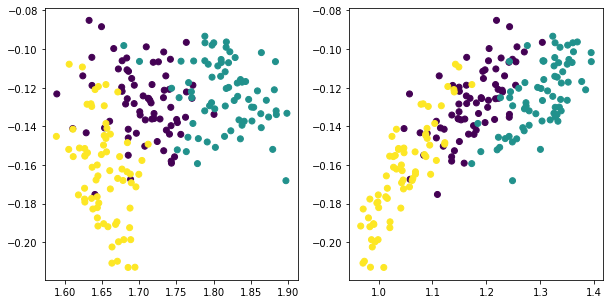

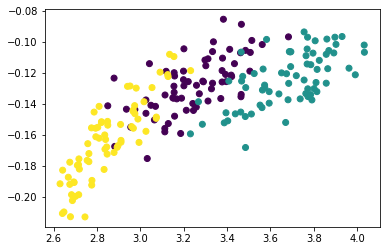

In [254]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(log_pd['length_k'], log_pd['compact'], c = seeds.group)
plt.subplot(1,2,2)
plt.scatter(log_pd['width_k'], log_pd['compact'], c = seeds.group)
plt.show()
plt.scatter(seeds['width_k'], log_pd['compact'], c = seeds.group)

In [257]:
r = estimate_one_population(log_pd[['compact']], log_pd[['length_k', 'width_k', 'length_k_g']])
predict = get_predict(r, log_pd[['length_k', 'width_k', 'length_k_g']])
predict = np.array(np.exp(predict)).reshape(-1)
error = predict - np.array(seeds.compact).reshape(-1)
error = (error**2).mean()
print('error: {}'.format(error))

r = estimate_one_population(log_pd[['compact']], seeds[['length_k', 'width_k', 'length_k_g']])
predict = get_predict(r, seeds[['length_k', 'width_k', 'length_k_g']])
predict = np.array(np.exp(predict)).reshape(-1)
error = predict - np.array(seeds.compact).reshape(-1)
error = (error**2).mean()
print('error: {}'.format(error))

error: 4.611121621251943e-05
error: 5.590017459616444e-05


计算根据长度预测的其他变量数据

In [267]:
from collections import OrderedDict
predict = OrderedDict()
X2 = seeds[['length_k', 'width_k', 'length_k_g']]
for k in ['area', 'perimeter', 'compact']:
    predict['{}_est'.format(k)] = get_predict(estimate_one_population(seeds[[k]], X2), X2)
    error = predict['{}_est'.format(k)] - seeds[k]
    error = np.array(error)
    print('{}: {}'.format(k, (error**2).mean()))
predict['compact_log_est'] = np.exp(get_predict(estimate_one_population(log_pd[['compact']], log_pd[X2.columns]), 
                                         log_pd[X2.columns]))
error = predict['compact_log_est'] - seeds['compact']
error = np.power(np.array(error).reshape(-1), 2).mean()
print('compact_log: {}'.format(error))

area: 0.05245333158332415
perimeter: 0.01537950531024445
compact: 5.372537788936088e-05
compact_log: 4.611121621251943e-05


In [268]:
est_data = pd.DataFrame(predict)
est_data.to_csv('./data/estimation_var.csv')

看看长度和凹陷长度的差值关系

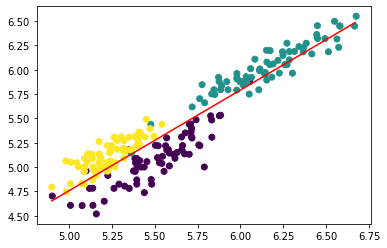

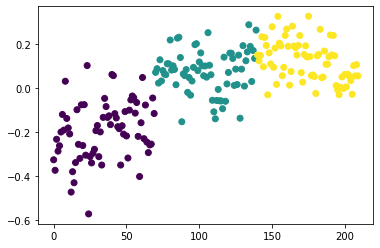

In [221]:
X_length = seeds.length_k
X_groove = seeds.length_k_g
r = estimate_one_population(seeds.iloc[:, [6]],seeds.iloc[:, [3]])
plt.scatter(X_length.values, X_groove.values, c = seeds.group)
x = np.arange(X_length.min(), X_length.max(), 0.01)
y = float(r['k']) * x + float(r['b'])
plt.plot(x, y, 'red')
plt.show()
gap = X_groove - (float(r['k']) * X_length + float(r['b']))
plt.scatter(np.arange(len(gap)), gap, c = seeds.group)

In [225]:
gap.name = 'gap'
if not os.path.exists('./data'):
    os.mkdir('./data')
gap.to_csv('data/gap.csv')

## 下面的不用看

In [27]:
mean = seeds.mean(axis = 0)

def cal_condition_dist(c1, c2):
    k = cov.iloc[c1,c2] / cov.iloc[c2,c2]
    b = mean[c1] - k*mean[c2]
    return k, b

def estimate_comp(cid = 4):
    # A and W
    # A = k1*W + b1
    k1, b1 = cal_condition_dist(0, cid)
    print(k1, b1)
    
    # P and W
    k2, b2 = cal_condition_dist(1, cid)
    print(k2, b2)

    lo = seeds.iloc[:,cid].min()
    hi = seeds.iloc[:,cid].max()

    #rg1 = 2
    #rg2 = 6

    w = np.arange(lo, hi, 0.01)
    A_w = k1*w + b1
    P_w = k2*w + b2
    C_w = 4 * np.pi * A_w / P_w**2
    
    A_pred = k1*seeds.iloc[:, cid] + b1
    P_pred = k2*seeds.iloc[:, cid] + b2
    C_pred = 4 * np.pi * A_pred / P_pred**2
    
    cm = plt.get_cmap('Paired').colors
    plt.figure(figsize = (9,3))
    plt.subplot(1,3,1)
    plt.plot(w, A_w)
    plt.scatter(seeds.iloc[:,cid], seeds.iloc[:, 0], s = 6, c = seeds['group'])
    print('Area square error: {:.4f}'.format(((A_pred - seeds.iloc[:,0])**2).mean()))
    
    plt.subplot(1,3,2)
    plt.plot(w, P_w)
    plt.scatter(seeds.iloc[:,cid], seeds.iloc[:, 1], s = 6, c = seeds['group'])
    print('Peri square error: {:.4f}'.format(((P_pred - seeds.iloc[:,1])**2).mean()))
    
    plt.subplot(1,3,3)
    #plt.subplot(1,2,1)
    #plt.plot(w, C_2)
    #plt.subplot(1,2,2)
    plt.plot(w, C_w)
    plt.scatter(seeds.iloc[:,cid], seeds.iloc[:, 2], s = 10, c = seeds['group'])
    print('Comp square error: {:.7f}'.format(((C_pred - seeds.iloc[:,2])**2).mean()))
    
    plt.show()

7.478270189068099 -9.521203039383924
3.2667751150538797 3.914156768299165
Area square error: 0.4854
Peri square error: 0.1821
Comp square error: 0.0001827


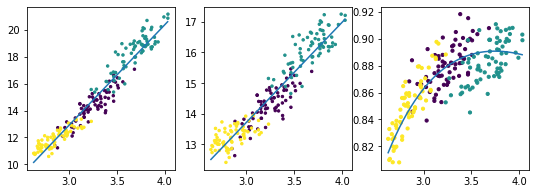

In [28]:
estimate_comp(4)

6.238772018600776 -20.267612456237952
2.8662787354129144 -1.5736596906103912
Area square error: 0.8218
Peri square error: 0.0923
Comp square error: 0.0005141


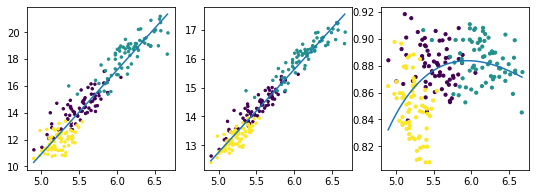

In [29]:
estimate_comp(3)

5.113298078778102 -12.80555743608522
2.3669850822877976 1.7584613189102836
Area square error: 2.1405
Peri square error: 0.3505
Comp square error: 0.0006387


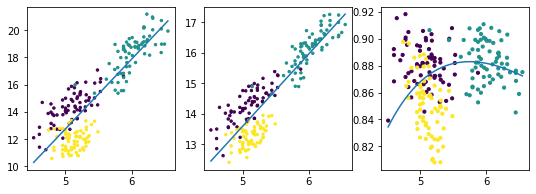

In [30]:
estimate_comp(6)

In [17]:
print(seeds.iloc[:,4].min())
print(seeds.iloc[:,4].max())

2.63
4.033
